### PCA Python from Scratch

In [24]:
import numpy as np
 
def PCA(X , num_components):
     
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
     
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
     
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
     
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
     
    return X_reduced

In [21]:
import pandas as pd
 
#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
target = data.iloc[:,4]
 
#Applying it to PCA function
mat_reduced = PCA(x , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
principal_df = pd.DataFrame(mat_reduced , columns = ['PC1','PC2'])
 
#Concat it with target variable to create a complete Dataset
principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)


<IPython.core.display.Javascript object>


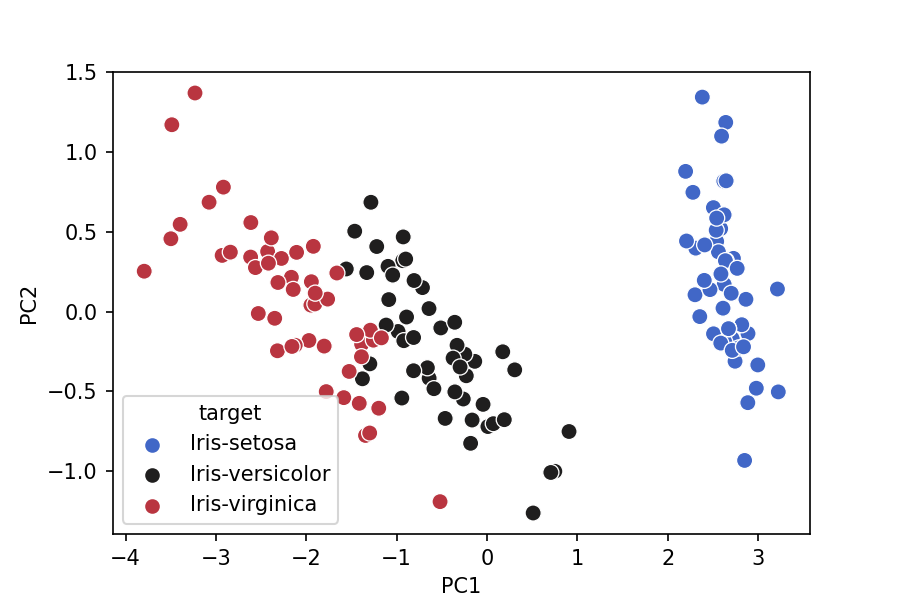

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

In [23]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,4))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2' , hue = 'target' , s = 60 , palette= 'icefire')


### Use Library

In [13]:
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [10]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='FlowerType')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<IPython.core.display.Javascript object>


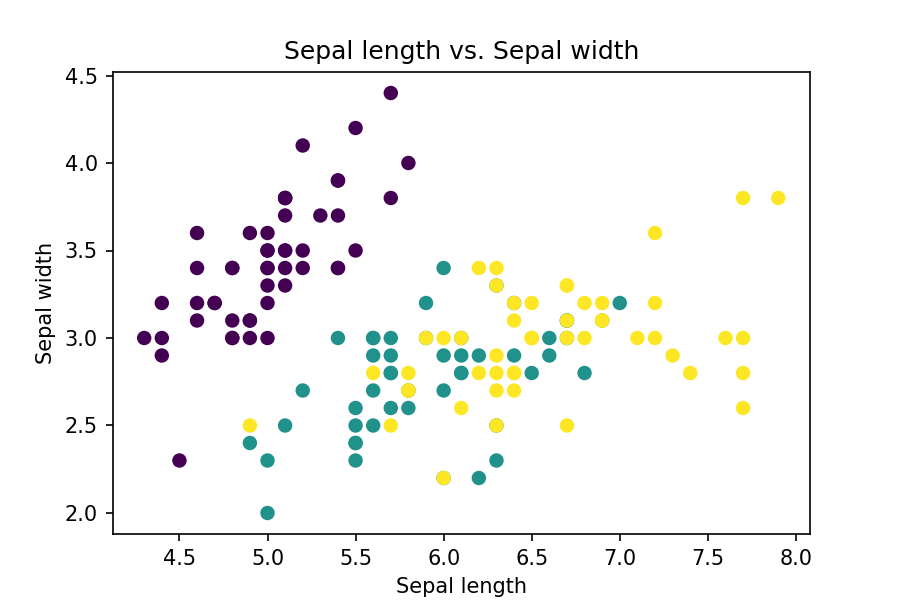

In [11]:
# Plot the original points.
plt.figure(1, figsize=(6, 4))
plt.clf()

plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], s=35, c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal length vs. Sepal width')
plt.show()

[4.22824171 0.24267075]


<IPython.core.display.Javascript object>


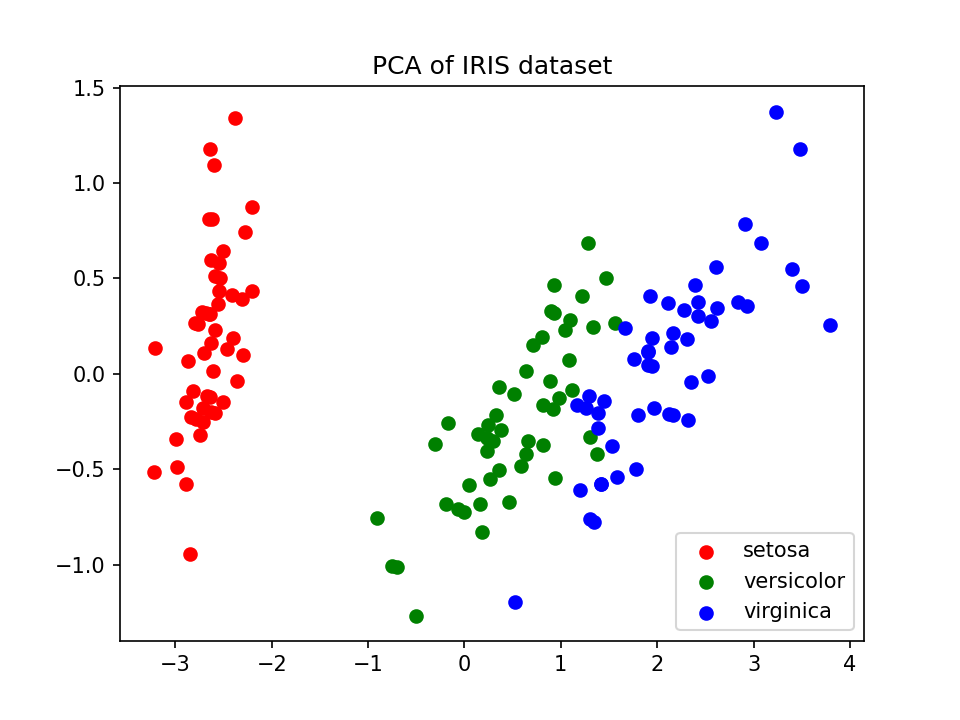

In [6]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print (pca.explained_variance_)

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y==i,0], X_r[y==i,1], c=c, label=target_name)
plt.legend()
plt.title('PCA of IRIS dataset')

plt.show()

<IPython.core.display.Javascript object>


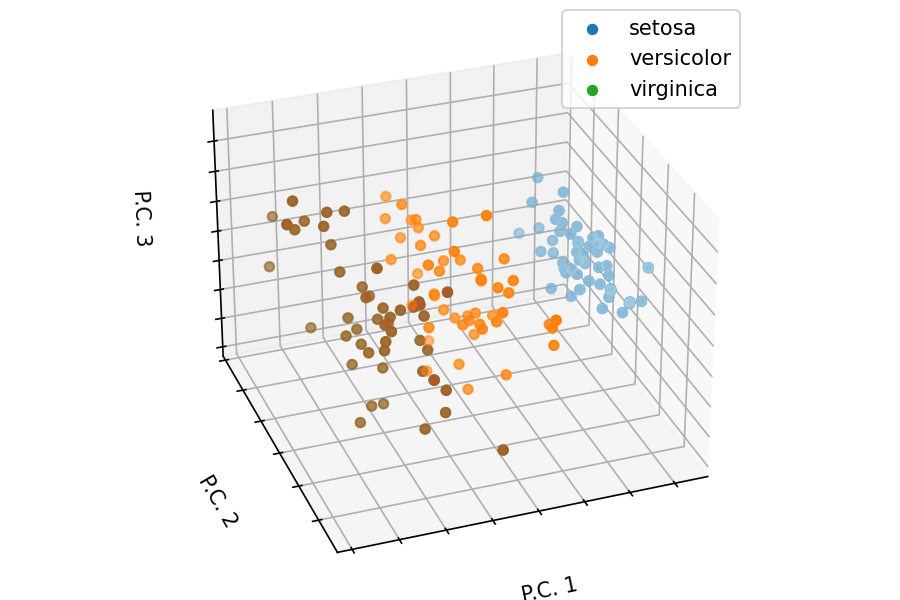

c:\users\neko_maru~\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


In [12]:
# PCA
pca_iris = PCA(n_components=3).fit(iris.data)
pca_iris.explained_variance_ratio_
pca_iris.transform(iris.data)

# We could have done everything in one line by setting the number of components we want (3), 
# fitting the PCA and transforming it to 3D:
iris_reduced = PCA(n_components=3).fit(iris.data)
iris_reduced.components_
iris_reduced = PCA(n_components=3).fit_transform(iris.data)

# Visualize 3D 
fig = plt.figure(1, figsize=(6, 4))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(iris_reduced[:, 0], iris_reduced[:, 1], iris_reduced[:, 2],
           cmap=plt.cm.Paired, c=iris.target)
for k in range(3):
    ax.scatter(iris_reduced[y==k, 0], iris_reduced[y==k, 1], iris_reduced[y==k, 2], label=iris.target_names[k])
ax.set_title("First three P.C.")
ax.set_xlabel("P.C. 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("P.C. 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("P.C. 3")
ax.w_zaxis.set_ticklabels([])
plt.legend(numpoints=1)
plt.show()

## Wrap it up:

[4.22824171 0.24267075]


<IPython.core.display.Javascript object>


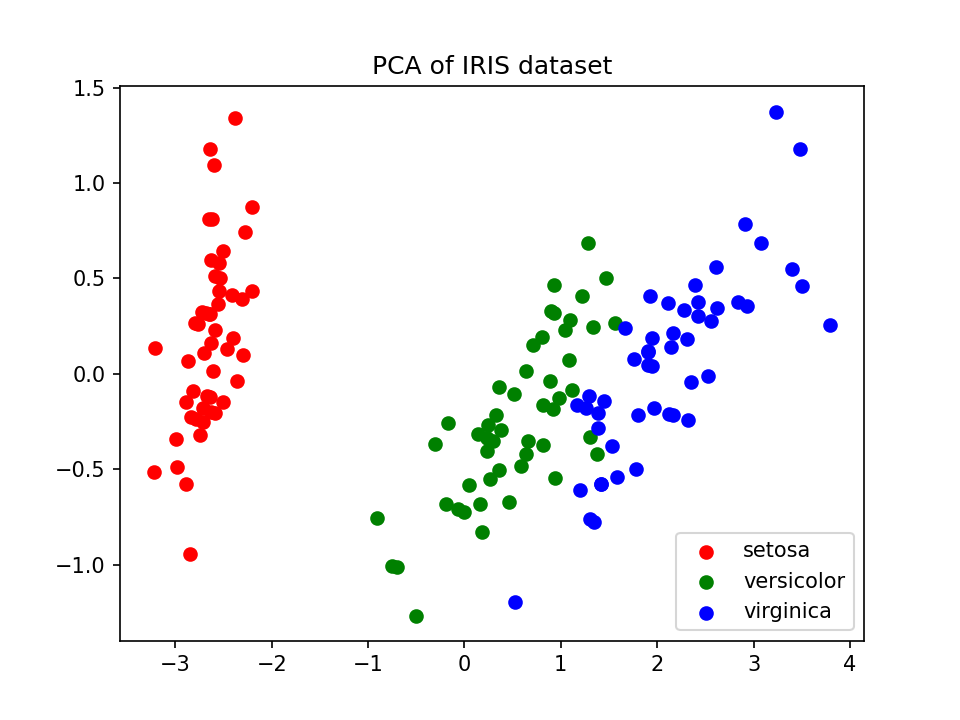

In [8]:
import pylab as pl

from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names


pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print (pca.explained_variance_)

pl.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    pl.scatter(X_r[y==i,0], X_r[y==i,1], c=c, label=target_name)
pl.legend()
pl.title('PCA of IRIS dataset')

pl.show()